# Exercises


### Evaluating Regression

In [1]:
from wrangle import wrangle_zillow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression#import r2_score from sklearn

from sklearn.metrics import r2_score

#### Getting zillow data

In [3]:
train, validate, test = wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [107]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068354 entries, 898710 to 358089
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1068354 non-null  float64
 1   bathrooms   1068354 non-null  float64
 2   area        1068354 non-null  float64
 3   tax_value   1068354 non-null  float64
 4   year_built  1068354 non-null  object 
 5   taxamount   1068354 non-null  float64
 6   fips        1068354 non-null  object 
dtypes: float64(5), object(2)
memory usage: 65.2+ MB


In [101]:
df = train.copy()
df = df.drop(columns= ['bedrooms', 'bathrooms', 'year_built', 'taxamount', 'fips'])
df = df.sample(1000)

In [102]:
df['baseline'] = baseline


In [103]:
X = df[['area']]
y = df['tax_value']

In [104]:
baseline = round(train.tax_value.mean(), 2)
baseline


341819.93

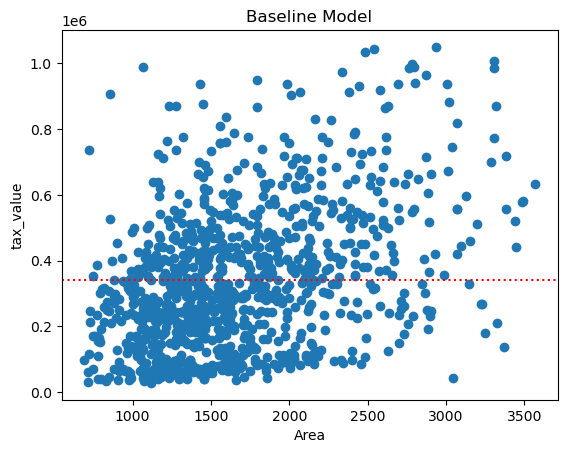

In [105]:
# plot data with baseline:

plt.scatter(X, y)
plt.axhline(baseline, ls=":", color='r')

plt.xlabel("Area")
plt.ylabel("tax_value")
plt.title("Baseline Model")
plt.show()

In [109]:

model = LinearRegression().fit(X, y)
predictions = model.predict(X)

df['predictions'] = predictions

residuals = y - predictions
residuals

baseline_residuals = y - baseline
baseline_residuals
df['baseline_residuals'] = baseline_residuals
df['residuals'] = residuals
df

,area,tax_value,baseline,predictions,baseline_residuals,residuals
1490875,1696.0,291490.0,341819.93,341008.813777,-50329.93,-49518.813777
35045,3285.0,700741.0,341819.93,580737.464447,358921.07,120003.535553
64149,1397.0,182704.0,341819.93,295899.394929,-159115.93,-113195.394929
401882,880.0,69627.0,341819.93,217900.834579,-272192.93,-148273.834579
886329,2151.0,114050.0,341819.93,409653.581590,-227769.93,-295603.581590
...,...,...,...,...,...,...
144166,1386.0,458409.0,341819.93,294239.851092,116589.07,164169.148908
145954,1742.0,353249.0,341819.93,347948.724369,11429.07,5300.275631
9584,1120.0,58647.0,341819.93,254109.063755,-283172.93,-195462.063755
1454351,1089.0,52767.0,341819.93,249432.167486,-289052.93,-196665.167486


In [41]:
predictions

array([616770.1368227 , 391917.65373715, 331088.79284377, ...,
       351365.07980823, 346089.94824024, 380213.45557067])

#### Plot the residuals for the linear regression model that you made.

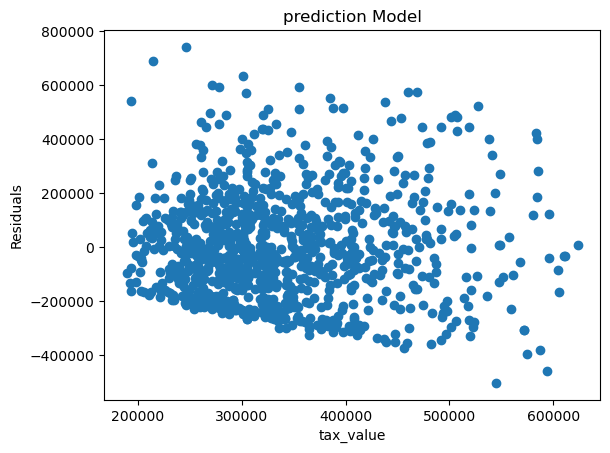

In [110]:
# plot data with baseline:

plt.scatter(predictions, residuals)


plt.xlabel("tax_value")
plt.ylabel("Residuals")
plt.title("prediction Model")
plt.show()

#### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [111]:
df['baseline_residual_2'] = df.baseline_residuals**2
df['residual_2']= df.residuals**2



In [112]:
#add the residuals together
SSE_baseline = df.baseline_residual_2.sum()
SSE = df.residual_2.sum()

In [113]:
print(f"SSE Baseline = {SSE_baseline: .1f}")
print(f"SSE = {SSE:.1f}")

SSE Baseline =  45681567994723.7
SSE = 38262427913178.7


In [114]:
# calcaluate MSE

MSE_baseline = SSE_baseline/len(df)
MSE = SSE/len(df)

print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 45681567994.7
MSE = 38262427913.2


In [115]:
# Calculate RMSE = (MSE)^(1/2)

RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))


RMSE baseline =  213732.5
RMSE =  195607.8


In [116]:
# Total Sum of Squares = SSE for baseline

TSS = SSE_baseline
TSS

45681567994723.66

In [117]:
# ESS - Explained Sum of Squares ('Explained Error')

ESS = TSS - SSE
ESS

7419140081544.93

In [118]:
# Calculate R^2 
R2 = ESS/TSS
R2

0.1624099260866409

In [20]:
df

,area,tax_value,baseline,predictions,baseline_residuals,residuals,baseline_residual_2,residual_2
898710,3349.0,208996.0,341819.93,616770.136823,-132823.93,-407774.136823,1.764220e+10,1.662797e+11
951392,1985.0,259657.0,341819.93,391917.653737,-82162.93,-132260.653737,6.750747e+09,1.749288e+10
1847439,1616.0,28940.0,341819.93,331088.792844,-312879.93,-302148.792844,9.789385e+10,9.129389e+10
706503,2028.0,87633.0,341819.93,399006.111782,-254186.93,-311373.111782,6.461100e+10,9.695321e+10
461225,1138.0,46382.0,341819.93,252291.515047,-295437.93,-205909.515047,8.728357e+10,4.239873e+10
...,...,...,...,...,...,...,...,...
1025016,1434.0,62992.0,341819.93,301086.482051,-278827.93,-238094.482051,7.774501e+10,5.668898e+10
1734384,1336.0,540464.0,341819.93,284931.391624,198644.07,255532.608376,3.945947e+10,6.529691e+10
1121629,1739.0,513043.0,341819.93,351365.079808,171223.07,161677.920192,2.931734e+10,2.613975e+10
533946,1707.0,157328.0,341819.93,346089.948240,-184491.93,-188761.948240,3.403727e+10,3.563107e+10


In [119]:
r2_score(y, df.predictions)

0.16228106851554236

In [43]:
def regression_errors(y, yhat):
    residuals = y - yhat
    baseline = round(y.mean(), 2)
    baseline_residuals = y - baseline
    values = {
        'SSE' : (residuals**2).sum(),
        'TSS' : (baseline_residuals**2).sum(),
        'ESS' : TSS - SSE,
        'MSE' : SSE/len(y),
        'RMSE' : MSE**.5   
        }
    return values

In [120]:
regression_errors(y, predictions)

{'SSE': 38262427913178.73,
 'TSS': 45674541275290.06,
 'ESS': 7419140081544.93,
 'MSE': 38262427913.17873,
 'RMSE': 195607.84215664444}

In [41]:
def baseline_mean_errors(y):
    baseline = round(y.mean(), 2)
    residuals = y - baseline
    values = {
        'SSE' : (residuals**2).sum(),
        'MSE' : SSE/len(y),
        'RMSE' : MSE**.5   
        }
    return values

In [45]:
baseline_mean_errors(y)

{'SSE': 4.961929285669926e+16,
 'MSE': 36898665953.082085,
 'RMSE': 192090.25470617213}

In [82]:
def better_than_baseline(y, yhat):
    model_score = r2_score(y, yhat)
    baseline = round(y.mean(), 2)
    baseline_arr = np.full(y.shape , baseline)
    baseline_score = r2_score(y, baseline_arr)
    if model_score > baseline_score:
        return True
    else: 
        return False
    

In [121]:
better_than_baseline(y, predictions)

True

In [59]:
x = np.full(y.shape, baseline)
len(x) == len(y)
len(predictions) == len(y)

True

In [77]:
baseline =  round(y.mean(), 2)
baseline_arr = np.full(y.shape , baseline)
base_df = pd.DataFrame(baseline_arr)
baseline_score = r2_score(y, baseline_arr)


-6.661338147750939e-16

In [64]:
type(y)

pandas.core.series.Series